<a href="https://colab.research.google.com/github/Shubhamsahu51/COMPUTER-VISION/blob/main/canny_edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import imutils
from scipy import ndimage
from google.colab.patches import cv2_imshow

!wget https://c1.wallpaperflare.com/preview/940/669/86/dove-pigeon-bird-animal.jpg

image_path = "/content/dove-pigeon-bird-animal.jpg"



Origianal Image, 	Dimension:  (607, 910, 3) 



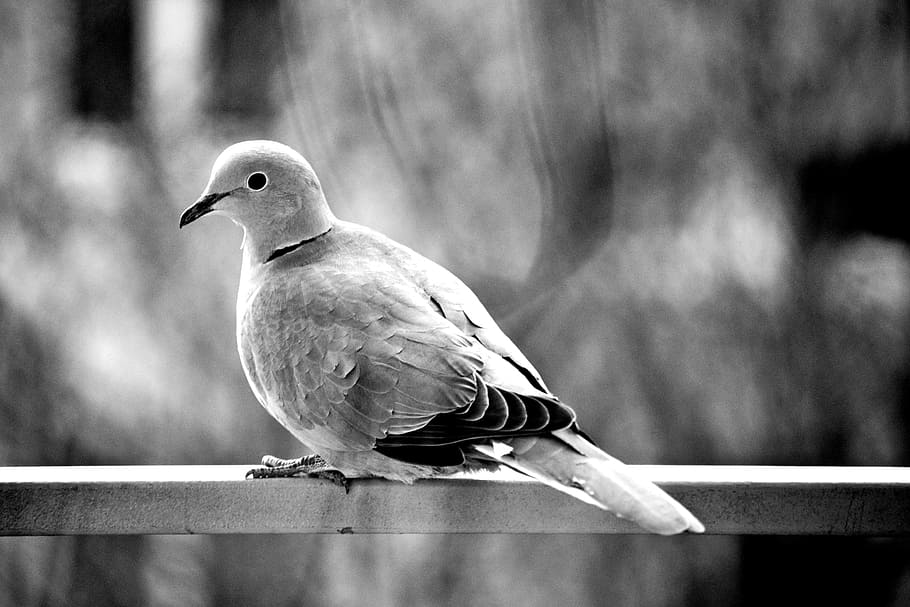

In [ ]:
color_image = cv2.imread(image_path)
print("\n\nOrigianal Image, \tDimension: ",color_image.shape,"\n")
cv2_imshow(color_image)


Noise reduction 

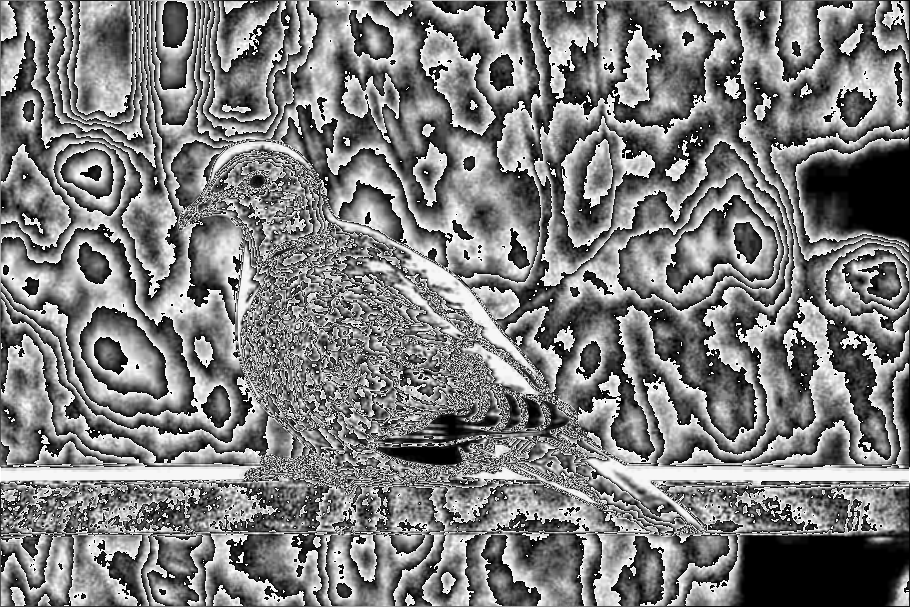

In [ ]:
shape = color_image.shape

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

gaussian_kernel_3_x_3 = gaussian_kernel(3)
# gaussian_kernel_3_x_3

blurred_image = np.copy(color_image)
#cv2_imshow(blurred_image)

for row in range(1,shape[0]-1):
    for column in range(1,shape[1]-1):

        sum = 0;

        for i in (-1,0,1):
            for j in (-1,0,1):

                sum += color_image[row + i][column + j]

        blurred_image[row][column] =   sum  

cv2_imshow(blurred_image)

In [ ]:
after_gradient_image = np.copy(blurred_image)


def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

G, theta = sobel_filters(blurred_image)   